### Tutorial 07: Extracting Features from Images

In this tutorial, we will explore step-by-step methods for extracting features from images. Feature extraction involves identifying key points, edges, or patterns in an image to enable analysis and recognition tasks. Using Python and libraries like OpenCV and scikit-image, we will cover the following methods:

- Color-Based Feature Extraction
- Edge Detection
- SIFT (Scale-Invariant Feature Transform)
- Circle Detection

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def display_image_with_mark_points(image, mark_pixels):
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (i, j) in mark_pixels:
                print("X", end=" ")  
            else:
                print('0', end=" ")
        print()

In [5]:
def display_image(image):
    for i in range(len(image)):
        for j in range(len(image[0])):
            print(f"{image[i][j]:03}", end=" ")
        print()

In [6]:
def apply_convolution(image, kernel):    
    img_height = len(image)
    img_width = len(image[0])
    kernel_size = len(kernel)
    pad = kernel_size // 2  

    output = [[0 for _ in range(img_width)] for _ in range(img_height)]
    
    for i in range(pad, img_height - pad):
        for j in range(pad, img_width - pad):
            conv_sum = 0
            for m in range(kernel_size):
                for n in range(kernel_size):
                    pixel = image[i + m - pad][j + n - pad]
                    weight = kernel[m][n]
                    conv_sum += pixel * weight
            output[i][j] = conv_sum
    
    return output

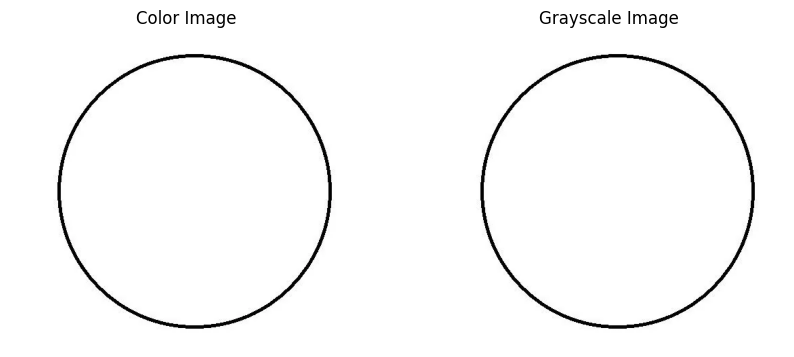

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as a color image
img_path = '../data/sphere/test.png'
color_image = cv2.imread(img_path, cv2.IMREAD_COLOR)

if color_image is None:
    raise Exception("Image not found")

gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

#gray_image = [[int(0.2989 * pixel[0] + 0.587 * pixel[1] + 0.114 * pixel[2]) for pixel in row] for row in resized_image]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(color_image)
axes[0].set_title("Color Image")
axes[0].axis("off")

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

plt.show()


In [14]:
resized_image = cv2.resize(gray_image, (16,16)) 
display_image(resized_image)

avg_pix_value = np.mean(resized_image) # reason for using this thresold: ?? 

border_pixels = [(i, j) for i in range(len(resized_image)) for j in range(len(resized_image[0])) if resized_image[i][j] < avg_pix_value]
#display_image_with_mark_points(resized_image, border_pixels)

lowest_x = min(border_pixels, key=lambda coord: coord[0])[0]
largest_x = max(border_pixels, key=lambda coord: coord[0])[0]
d1 = largest_x - lowest_x

lowest_y = min(border_pixels, key=lambda coord: coord[1])[1]
largest_y = max(border_pixels, key=lambda coord: coord[1])[1]

d2 = largest_y - lowest_y
if np.abs(d1-d2)<5:
    print('Circle is detected.')

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 008 253 255 249 254 255 255 255 255 255 
255 255 255 255 252 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 254 255 255 255 255 255 255 255 255 255 131 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 231 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 007 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 000 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 255 
255 255 248 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 
255 255 255 249 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 009 255 255 255 255 255 255 255 253 255 255 255 
255 255 255 255 255 248 253 255 255 255 031 255 255 255 255 255 
255 255 255 255 255 255 2

In [9]:
kernel = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]

output_image = apply_convolution(gray_image, kernel)
display_image(output_image)


000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 003 003 250 -1974 231 008 -47 -02 001 000 000 000 000 
000 000 000 003 -24 250 249 249 008 007 007 001 000 000 000 000 
000 000 001 004 004 003 000 000 000 000 000 000 124 124 124 000 
000 000 001 -08 001 000 000 000 000 000 000 000 124 -992 124 000 
000 024 025 025 001 000 000 000 000 000 000 000 124 124 124 000 
000 024 -192 024 000 000 000 000 000 000 000 000 000 248 248 000 
000 024 024 024 000 000 000 000 000 000 000 000 000 503 -1729 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 504 -1791 000 
000 007 007 007 000 000 000 000 000 000 000 000 000 256 247 000 
000 007 -56 007 000 000 000 000 000 000 000 000 002 003 003 000 
000 007 013 013 006 000 000 000 000 000 000 000 002 -16 002 000 
000 000 006 198 252 246 000 000 000 000 000 002 004 004 002 000 
000 000 006 252 -1955 255 009 002 000 224 224 226 -16 002 000 000 
000 000 000 246 253 192 -09 002 000 224 -1792 226 002 002 000 000 
000 000 000 0

In [ ]:
def extract_contour_no(gray_img):
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours

In [ ]:
import cv2
import numpy as np

def extract_contour(gray_img):
    # Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray_img)

    # Optionally, apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 50, 250)

    # Perform Morphological Operations
    kernel = np.ones((2, 2), np.uint8)

    # Apply Opening (erosion followed by dilation)
    opened = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

    # Apply Closing (dilation followed by erosion)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

    # Find contours from the processed image
    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    return contours


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as a color image
img_path = '../data/sphere/7.jpg'
#img_path = './data/pet_images/Golden_retriever_05182.jpg'
color_image = cv2.imread(img_path, cv2.IMREAD_COLOR)

if color_image is None:
    raise Exception("Image not found")

resized_image = cv2.resize(color_image, (640, 480)) 
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Extract contours
contours = extract_contour(gray_image)
contour_image = cv2.drawContours(resized_image.copy(), contours, -1, (0, 255, 0), 2)


# Extract SIFT features
sift = cv2.SIFT_create(contrastThreshold=0.04, nOctaveLayers=3)
keypoints_sift, descriptors = sift.detectAndCompute(gray_image, None)
print(f'Number of keypoints detected by SIFT: {len(keypoints_sift)}')


# Extract ORB features
orb = cv2.ORB_create()
orb = cv2.ORB_create(nfeatures=5000)  # Set to detect more keypoints
keypoints_orb, descriptors = orb.detectAndCompute(gray_image, None)
print(f'Number of keypoints detected by ORB: {len(keypoints_orb)}')

img_orb = cv2.drawKeypoints(resized_image.copy(), keypoints_orb, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
img_keypoints = cv2.drawKeypoints(resized_image.copy(), keypoints_sift, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Display the original color image 
ax[0, 0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
ax[0, 0].axis('off')
ax[0, 0].set_title('Original Color Image')

# Display the contour-detected image 
ax[0, 1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
ax[0, 1].axis('off')
ax[0, 1].set_title('Detected Contours')

# Display the SIFT features image 
ax[1, 0].imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
ax[1, 0].axis('off')
ax[1, 0].set_title('SIFT Features')

# Display the ORB features image 
ax[1, 1].imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
ax[1, 1].axis('off')
ax[1, 1].set_title('ORB Features')

# Display the images
plt.tight_layout()
plt.show()




In [ ]:
def check_sphere_ball(contours,image):  
    
    min_area = 100  # Minimum area threshold
    max_area = 5000  # Maximum area threshold

    # Filter contours based on area
    filtered_contours = [contour for contour in contours if min_area < cv2.contourArea(contour) < max_area]
        
    valid_contours = []
    for contour in filtered_contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        if perimeter == 0:  # Avoid division by zero
            continue

        circularity = 4 * np.pi * area / (perimeter ** 2)
        
        # Check if the contour is roughly circular--> 0.01 < circularity < 2 and 
        if area > min_area and circularity>0:
            valid_contours.append(contour)
    

    for contour in valid_contours:
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Ball Detection')
    plt.show()


# Load the image as a color image
img_path = '../data/sphere/7.jpg'
#img_path = './data/pet_images/Golden_retriever_05182.jpg'
color_image = cv2.imread(img_path, cv2.IMREAD_COLOR)

if color_image is None:
    raise Exception("Image not found")

resized_image = cv2.resize(color_image, (640, 480)) 
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Extract contours
contours = extract_contour(gray_image)
contour_image = cv2.drawContours(resized_image.copy(), contours, -1, (0, 255, 0), 2)
check_sphere_ball(contours,resized_image.copy())

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def connected_components(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    _, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    
    num_labels, labels = cv2.connectedComponents(binary_image)
    output_image = cv2.convertScaleAbs(labels)  
   
    color_map = np.random.randint(0, 255, (num_labels, 3), dtype=np.uint8)
    color_image = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)

    
    for i in range(num_labels):
        color_image[labels == i] = color_map[i]

    return num_labels, labels, color_image


img_path = '../data/sphere/7.jpg'
image = cv2.imread(img_path)

if image is None:
    raise Exception("Image not found")

num_labels, labels, result_image = connected_components(image)

# Show the results
plt.figure(figsize=(8, 8))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title(f"Connected Components (Total: {num_labels - 1})")
plt.axis('off')

plt.show()


In [ ]:
## Detecting the circle 

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, param1=130, param2=30, minRadius=50, maxRadius=250)
if circles is not None:
    for x, y, r in circles[0]:
        c = plt.Circle((x, y), r, fill=False, lw=3, ec='C1')
        plt.gca().add_patch(c)
plt.gcf().set_size_inches((12, 8))
plt.show()